# outlier_detection_using_IQR

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
df1 = pd.read_csv('dataset/placement.csv')
df1

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
998,8.62,46.0,1


In [32]:
df1.shape

(1000, 3)

In [33]:
df1.describe()

,cgpa,placement_exam_marks,placed
count,1000.000000,1000.000000,1000.000000
mean,6.961240,32.225000,0.489000
std,0.615898,19.130822,0.500129
min,4.890000,0.000000,0.000000
25%,6.550000,17.000000,0.000000
50%,6.960000,28.000000,0.000000
75%,7.370000,44.000000,1.000000
max,9.120000,100.000000,1.000000


C:\Users\CS-L2-PC15\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


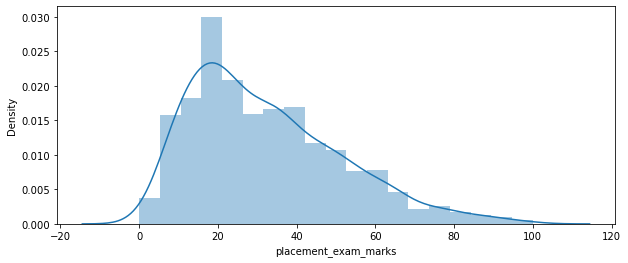

In [34]:
fig = plt.figure(figsize=(10,4))
sns.distplot(df1["placement_exam_marks"])
plt.show()

C:\Users\CS-L2-PC15\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


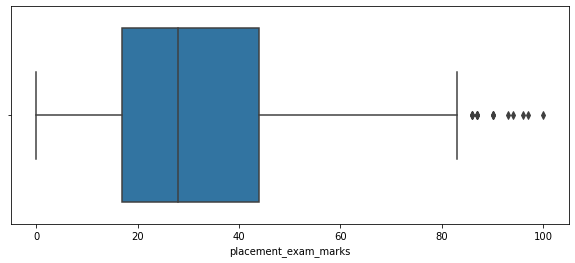

In [35]:
fig = plt.figure(figsize=(10,4))
sns.boxplot(df1["placement_exam_marks"])
plt.show()

In [36]:
df1["placement_exam_marks"].skew()

0.8356419499466834

**finding the iqr**

In [37]:
Q1 = df1['placement_exam_marks'].quantile(0.25)
Q1

17.0

In [38]:
Q3 = df1['placement_exam_marks'].quantile(0.75)
Q3

44.0

In [39]:
IQR = Q3-Q1
IQR

27.0

**finding the lower limit**

In [40]:
ll = Q1 - 1.5*IQR
ll

-23.5

**finding the upper limit**

In [41]:
ul = Q3 + 1.5*IQR
ul

84.5

**Finding the outliers**

In [42]:
df1[df1["placement_exam_marks"]>ul]

,cgpa,placement_exam_marks,placed
9,7.75,94.0,1
40,6.60,86.0,1
61,7.51,86.0,0
134,6.33,93.0,0
162,7.80,90.0,0
283,7.09,87.0,0
290,8.38,87.0,0
311,6.97,87.0,1
324,6.64,90.0,0
630,6.56,96.0,1


**Triming**

In [43]:
df2=df1[(df1["placement_exam_marks"]<ul) | (df["placement_exam_marks"]<ll)]
df2

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
998,8.62,46.0,1


**capping**

In [44]:
df3 = df.copy()
df3

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
998,8.62,46.0,1


In [45]:
df3['placement_exam_marks'] = np.where(
    df3['placement_exam_marks']>ul,
    ul,
    np.where(
        df3['placement_exam_marks']<ll,
        ll,
        df3['placement_exam_marks']
    )
)

In [46]:
df3

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
998,8.62,46.0,1


C:\Users\CS-L2-PC15\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\CS-L2-PC15\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


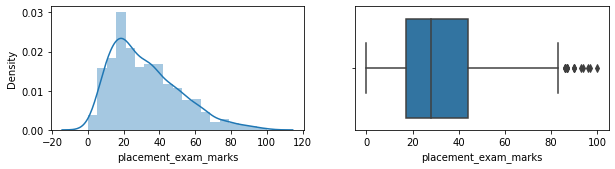

C:\Users\CS-L2-PC15\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\CS-L2-PC15\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


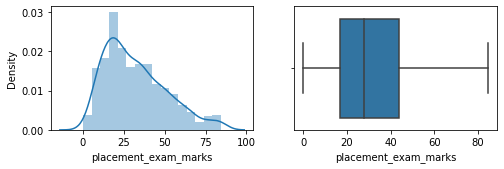

In [49]:
plt.figure(figsize=(10,5))
plt.subplot(2,2,1)
sns.distplot(df1["placement_exam_marks"])
plt.subplot(2,2,2)
sns.boxplot(df1["placement_exam_marks"])
plt.show()

#new
plt.figure(figsize=(8,5))
plt.subplot(2,2,3)
sns.distplot(df3["placement_exam_marks"])
plt.subplot(2,2,4)
sns.boxplot(df3["placement_exam_marks"])
plt.show()